# Breast Cancer Detection Using Logistic Regression

---

## Dataset Overview

The **Breast Cancer Detection Dataset** (e.g., Wisconsin Breast Cancer Dataset) contains features extracted from digitized images of breast tissue samples. It is used to classify tumors as:

- **Malignant (cancerous)**
- **Benign (non-cancerous)**

### Common Features:
- Radius
- Texture
- Perimeter
- Area
- Smoothness
- Compactness
- Concavity
- Symmetry
- Fractal dimension
- etc

Each feature describes physical characteristics of the cell nuclei in the tumor samples.

---

## Logistic Regression Model

Logistic regression is a widely-used binary classification algorithm that models the probability of a tumor being malignant. It applies the sigmoid function to a weighted sum of features:

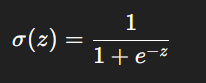

The output is a probability between 0 and 1. If the probability is above a chosen threshold (usually 0.5), the tumor is classified as malignant.

---

In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [34]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [35]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [36]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [37]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [39]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [41]:
df.drop('id',axis=1,inplace=True)

In [46]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
encoded = l.fit_transform(df['diagnosis'])

In [47]:
df['diagnosis']=encoded

In [48]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
for i,c in enumerate(l.classes_):
    print(f"{c}->{i}")

0->0
1->1


In [22]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Standardize the features

We are gonna standardize the features that are not within 0 and 1

In [51]:
from sklearn.preprocessing import StandardScaler

# Select only float64 columns
float_cols = df.select_dtypes(include=['float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the float columns
df[float_cols] = scaler.fit_transform(df[float_cols])


In [52]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


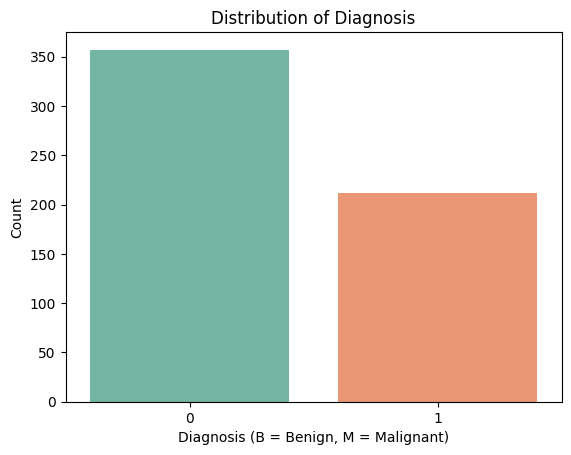

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot
sns.countplot(x='diagnosis', data=df, palette='Set2')

plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (B = Benign, M = Malignant)')
plt.ylabel('Count')
plt.show()


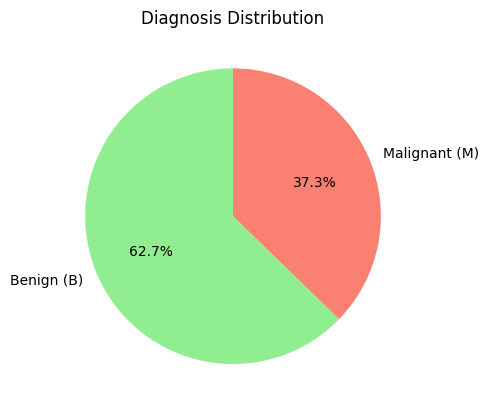

<Figure size 640x480 with 0 Axes>

In [61]:
# Pie chart
df['diagnosis'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'salmon'],
    labels=['Benign (B)', 'Malignant (M)']
)

plt.title('Diagnosis Distribution')
plt.ylabel('')
plt.show()
plt.savefig("distrib.png")


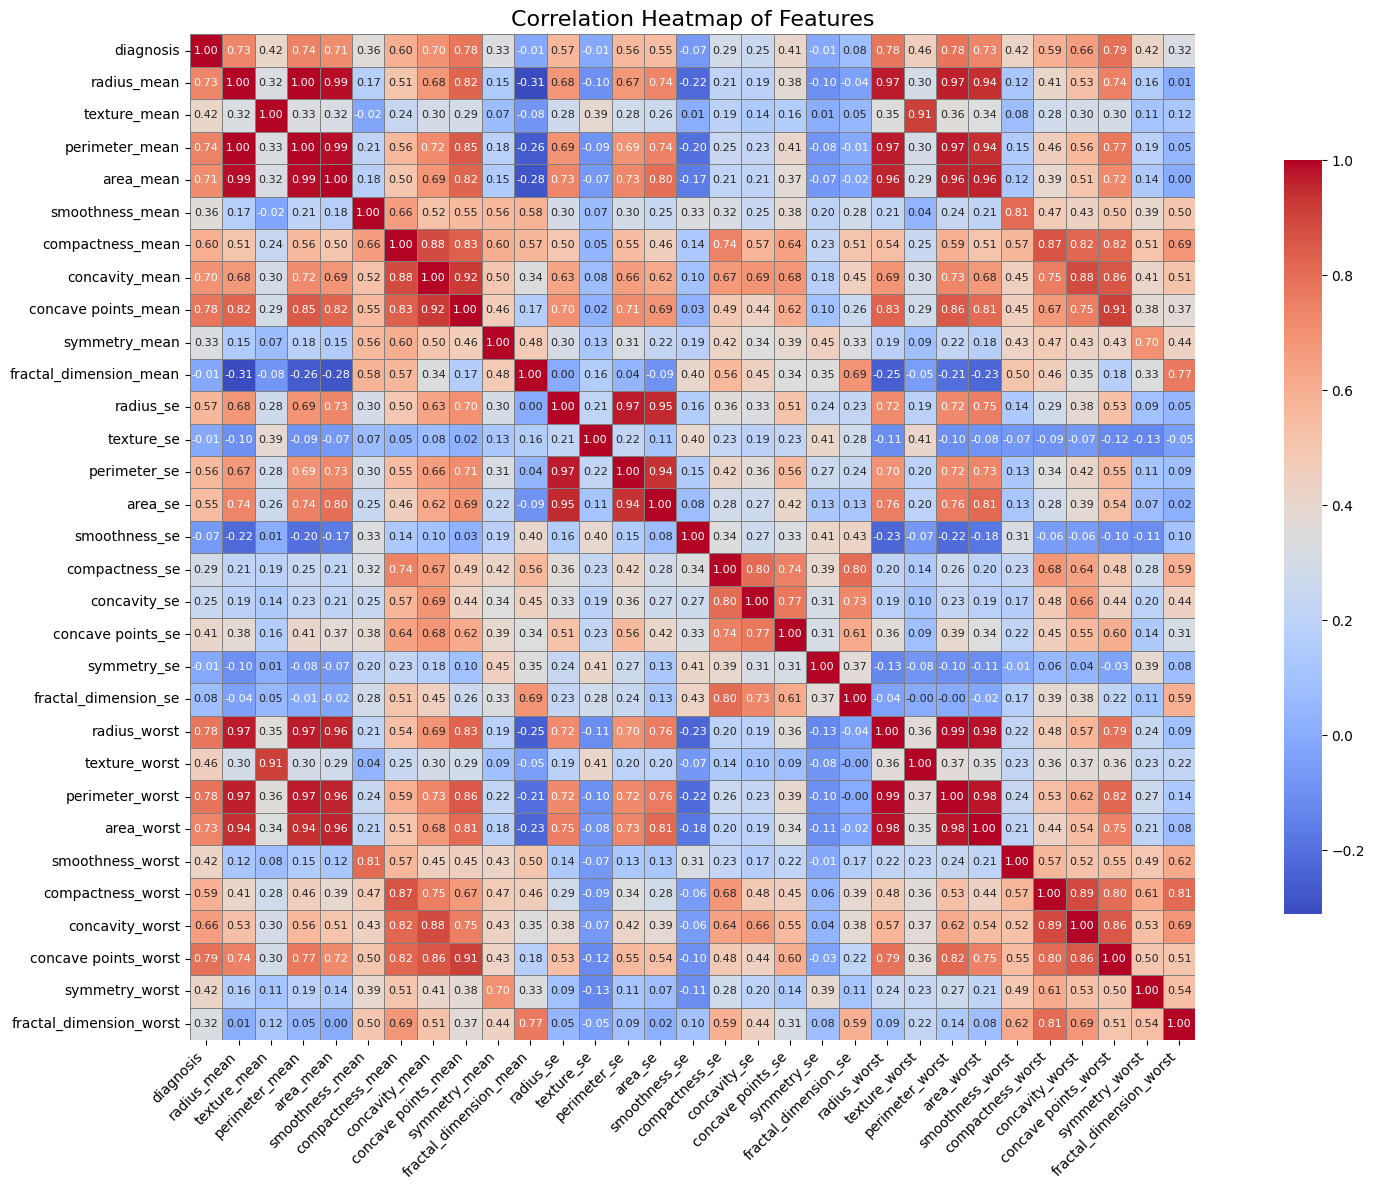

<Figure size 640x480 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))  # Set figure size

sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",           # Color gradient from blue to red
    linewidths=0.5,            # Line between cells
    linecolor='gray',
    square=True,               # Make cells square
    cbar_kws={"shrink": 0.75}, # Shrink color bar
    annot_kws={"size": 8}      # Annotation font size
)

plt.title("Correlation Heatmap of Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
plt.savefig("corrmap.png")


## Analysis of the correlation heatmap

We see from the heatmap that there are many features which are correlated and not any correlation that is near perfect positive correlation.. 

Now it will be very time consuming for us to do the feature selection by ourselves,if we want we can do it.For exampe radius is correlated with area as radius is used in the calculation area .. But we are gonna use L1 regularized logistic regression,What L1 regularization does is it shrinks coefficents of some features to zero hence doing feature selection.

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1',solver='liblinear')


In [64]:
X,y = df.drop("diagnosis",axis=1),df['diagnosis']

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
X_train.shape,y_train.shape

((455, 30), (455,))

In [69]:
X_test.shape,y_test.shape

((114, 30), (114,))

## Training the Model

In [70]:
model.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

## Evaluation Metrics

### Classification Report

In [74]:
from sklearn.metrics import classification_report
print("Train Report:\n",classification_report(y_train,model.predict(X_train)))

Train Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       288
           1       0.99      0.98      0.99       167

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



In [75]:
from sklearn.metrics import classification_report
print("Test Report:\n",classification_report(y_test,model.predict(X_test)))

Test Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        69
           1       0.96      0.96      0.96        45

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Recall(TPR),Precision,F1 score looks excellent.

### Checking Cross Val Score

In [76]:
from sklearn.model_selection import cross_val_score
model1 = LogisticRegression(penalty='l1',solver='liblinear')

scores = cross_val_score(model1, X, y, cv=5, scoring='accuracy')  # 5-fold CV

print("Cross-validation accuracy scores:", scores)
print("Mean CV accuracy:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation accuracy scores: [0.96491228 0.96491228 0.98245614 0.97368421 0.99115044]
Mean CV accuracy: 0.9754230709517155
Standard deviation: 0.010205795796817484


In [78]:
scores = cross_val_score(model1, X, y, cv=5, scoring='precision')  # 5-fold CV

print("Cross-validation precision scores:", scores)
print("Mean CV precision:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation precision scores: [0.97560976 0.95348837 1.         0.97560976 0.97674419]
Mean CV precision: 0.9762904140669313
Standard deviation: 0.014718764097908621


In [79]:
scores = cross_val_score(model1, X, y, cv=5, scoring='recall')  # 5-fold CV

print("Cross-validation recall scores:", scores)
print("Mean CV recall:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation recall scores: [0.93023256 0.95348837 0.95238095 0.95238095 1.        ]
Mean CV recall: 0.9576965669988926
Standard deviation: 0.02288262506009644


In [80]:
scores = cross_val_score(model1, X, y, cv=5, scoring='f1')  # 5-fold CV

print("Cross-validation f1 scores:", scores)
print("Mean CV f1:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation f1 scores: [0.95238095 0.95348837 0.97560976 0.96385542 0.98823529]
Mean CV f1: 0.9667139592751861
Standard deviation: 0.013644233467615202


We have checked cross validated score for 5 folds and there is no sign of overfitting.Precision,recall,f1 and accuracy scores are consistent through out the folds.

### Confusion Matrix

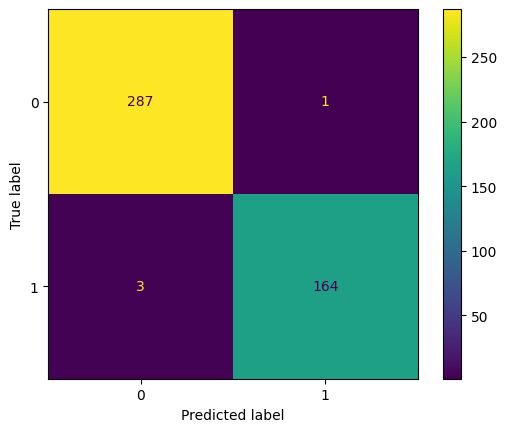

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_train, model.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()  # This will plot the confusion matrix


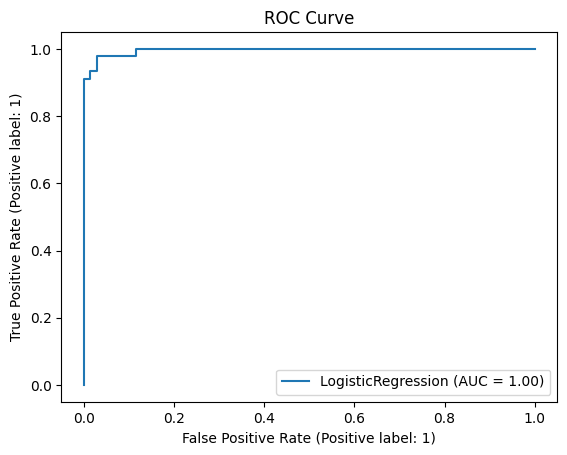

In [88]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Suppose you have a trained classifier 'clf', and test data X_test, y_test

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.show()


In [89]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_scores)

print(f"AUC Score: {auc_score:.4f}")


AUC Score: 0.9958


## Thresholding

In [92]:
thresholds = np.arange(0.0, 1.0, 0.01)

In [94]:
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

### Threshold with respect to f1

In [107]:
import numpy as np
from sklearn.metrics import f1_score
# Tune threshold
best_threshold = 0.5
best_f1=0
y_scores = model.predict_proba(X_test)[:,1]

for t in thresholds:
    y_pred_thresh = (y_scores>=t).astype(int) # converts to either 0 or 1
    f1= f1_score(y_test,y_pred_thresh)
    if f1>best_f1:
        best_f1 = f1
        best_threshold = t
print(f"Best Threshold is {best_threshold} with f1 score:{best_f1}")
        
    


Best Threshold is 0.46 with f1 score:0.967032967032967


In [99]:
(y_scores>=0.32).astype(int)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1])

### Threshold with respect to precision

In [106]:
import numpy as np
from sklearn.metrics import precision_score

# Define thresholds to try
thresholds = np.arange(0.0, 1.0, 0.01)

# Tune threshold for best precision
best_thresholdp = 0.5
best_p = 0
y_scores = model.predict_proba(X_test)[:, 1]

for t in thresholds:
    y_pred_thresh = (y_scores >= t).astype(int)  # convert probabilities to 0/1 using threshold t
    p = precision_score(y_test, y_pred_thresh)
    if p > best_p:
        best_p = p
        best_thresholdp = t

print(f"Best Threshold is {best_thresholdp:.2f} with precision score: {best_p:.4f}")

    

Best Threshold is 0.71 with precision score: 1.0000


### Threshold with respect to recall

In [104]:
import numpy as np
from sklearn.metrics import recall_score

# Define thresholds to try
thresholds = np.arange(0.0, 1.0, 0.01)

# Tune threshold for best recall
best_thresholdr = 0.5
best_r = 0
y_scores = model.predict_proba(X_test)[:, 1]

for t in thresholds:
    y_pred_thresh = (y_scores >= t).astype(int)  # convert probabilities to 0/1 using threshold t
    r = recall_score(y_test, y_pred_thresh)
    if r > best_r:
        best_r = r
        best_thresholdr = t

print(f"Best Threshold is {best_thresholdr:.2f} with recall score: {best_r:.4f}")


Best Threshold is 0.00 with recall score: 1.0000


### Thresholds with respect to accuracy

In [108]:
import numpy as np
from sklearn.metrics import accuracy_score

# Define thresholds to try
thresholds = np.arange(0.0, 1.0, 0.01)

# Tune threshold for best accuracy
best_threshold_acc = 0.5
best_acc = 0
y_scores = model.predict_proba(X_test)[:, 1]

for t in thresholds:
    y_pred_thresh = (y_scores >= t).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    if acc > best_acc:
        best_acc = acc
        best_threshold_acc = t

print(f"Best Threshold is {best_threshold_acc:.2f} with accuracy score: {best_acc:.4f}")


Best Threshold is 0.46 with accuracy score: 0.9737


### Sigmoid Function

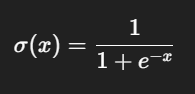

The equation of sigmoid function is given above..

It always output values between 0 and 1.It is used in logistic regression and in nueral networks as activation function.
Sigmoid maps the values of linear classifier to probability and it overcomes the problem of outliers by saturating between 0 and 1.

